<a href="https://www.kaggle.com/code/iremakdogan/s7l54-exercise-on-hidden-units-number?scriptVersionId=187619887" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import torch
import torch.nn as nn
import numpy as np
# Import and process the data
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from IPython import display
display.set_matplotlib_formats('svg')


I am following the Deep Learning course of Mike X Cohen on Udemy, Lecture 54 Exercise on seperating Iris dataset by simple ANN model by modifiying the number of hidden units

How parameters (number of hidden units) change the model architecture and the accuracy?
Comparing the number of hidden units on Irıs dataset

# Process the Data

In [2]:
iris = sns.load_dataset('iris')
# check the data
iris.head() # stored as PANDAS dataframe

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
# organize the data
# turn pandas data  frame into tensor
# take the first 4 column because last column is the output variable
data = torch.tensor(iris[iris.columns[0:4]].values).float()
# transform output labels to number
labels = torch.zeros(len(data), dtype=torch.long)
labels[iris.species=='setosa'] = 0
labels[iris.species=='versicolor'] = 1
labels[iris.species=='virginica'] = 2

# Create ANN Model

In [4]:
def buildModel(layerCnt): #number of layers will change
  ANNiris = nn.Sequential(
    nn.Linear(4, layerCnt),  # Input layer
    nn.ReLU(),
    nn.Linear(layerCnt, layerCnt), # Hidden Layer
    nn.ReLU(),
    nn.Linear(layerCnt, 3), # Output Layer
    nn.Softmax(1)
  )

  # Loss function
  # CrossEntropyLoss automatically includes Softmax function so we didnot add it
  lossfun = nn.CrossEntropyLoss()

  # optimizer
  optimizer = torch.optim.SGD(ANNiris.parameters(), lr =.01)

  return ANNiris, lossfun, optimizer

def trainTestModel(ANNiris, data):

  losses = torch.zeros(numepochs)


  for epochi in range(numepochs):

    # forward prop
    yHat = ANNiris(data) # shape of yHat:150x3, 150 data for 3 output for each categroy

    # compute loss
    loss = lossfun(yHat, labels)
    losses[epochi] = loss

    # backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  # final forward pass
  predictions = ANNiris(data)

  predlabels = torch.argmax(predictions, axis=1) == labels
  predlablesN = predlabels.float()
  totalAcc = 100*torch.mean(predlablesN)
  return totalAcc

Parametric Experiment on Layer number

In [5]:
  numepochs = 500
  numhiddens = np.arange(1,129)
  acc_hu = []
  for h_unit in numhiddens:
    # create and test the model
    ANNiris, lossfun, optimizer = buildModel(h_unit)
    totalAcc = trainTestModel(ANNiris, data)
    # store the accuracies
    acc_hu.append(totalAcc)


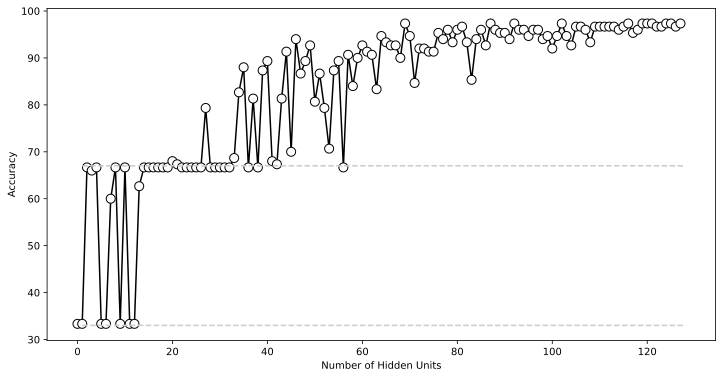

In [6]:
# Plot

fig, ax = plt.subplots(1,figsize=(12,6))
ax.plot(acc_hu, 'ko-', markerfacecolor='w', markersize=9)
ax.plot(numhiddens[[0,-1]],[33,33], '--', color=[.8,.8,.8])
ax.plot(numhiddens[[0,-1]],[67,67], '--', color=[.8,.8,.8])
ax.set_ylabel('Accuracy')
ax.set_xlabel('Number of Hidden Units')
plt.show()


Accuracy increased with number of hidden units 